# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd

In [2]:
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

In [3]:
student_data

,X,Y
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

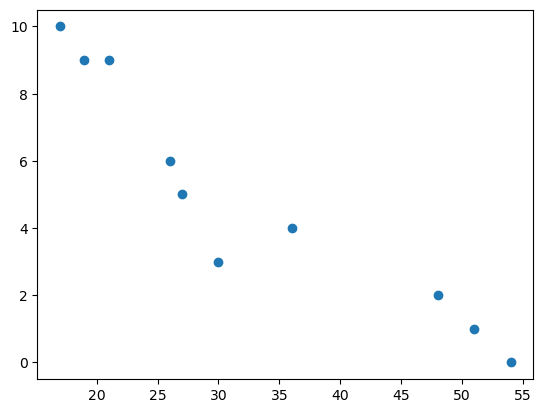

In [4]:
import matplotlib.pyplot as plt
#draw a scatter plot for the student_data
plt.scatter(student_data['X'], student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
#Sí, podemos ver en la gráfica que hay una relación lineal entre las variables X e Y. La variable X es la edad de los estudiantes y la variable Y lo tarde que llegan a clase.
#Entonces, podría decirse que los estudiantes más jóvenes llegan más tarde a clase.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
covariance = student_data['X'].cov(student_data['Y'])
correlation = student_data['X'].corr(student_data['Y'])

covariance, correlation

(-45.56666666666667, -0.9391626886887122)

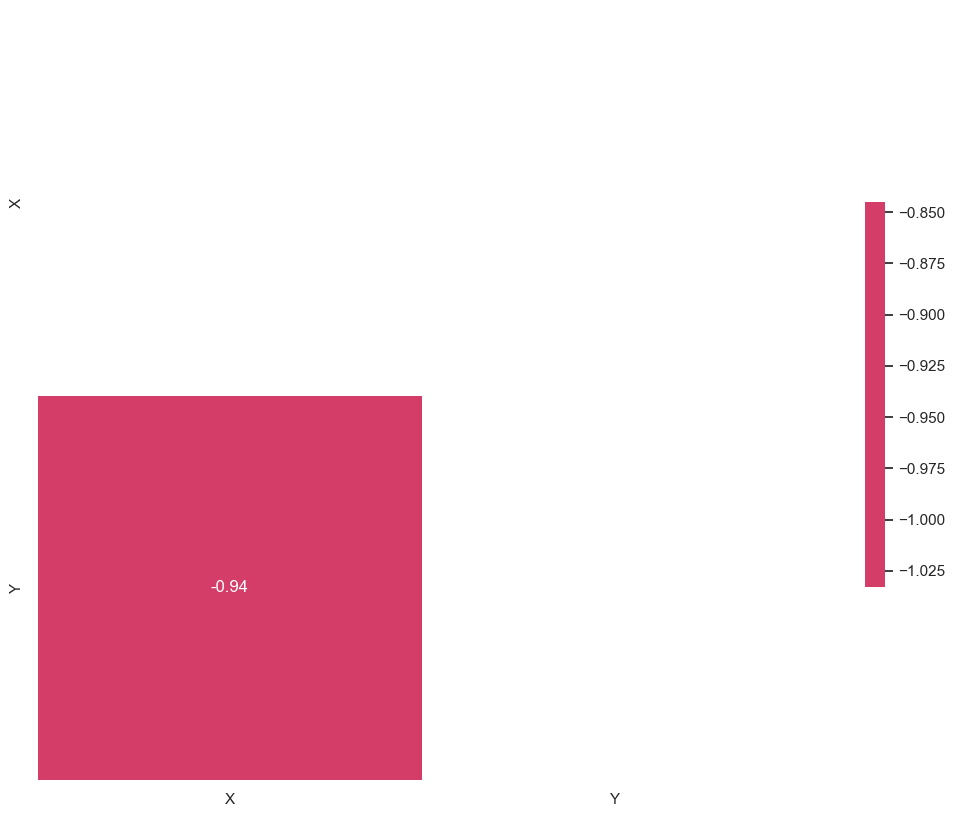

In [7]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(student_data.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(student_data.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.model_selection import train_test_split as tts 

X = student_data.drop('X', axis=1)
y = student_data['Y']

X_train, X_test, y_train, y_test = tts(X, y, train_size= 0.8, test_size= 0.2, random_state= 42)

linreg = LinReg()
linreg.fit(X_train, y_train)

y_pred_train = linreg.predict(X_train)
y_pred_train

array([ 2., 10.,  6.,  5.,  3.,  4.,  9.,  9.])

Plot your regression model on your scatter plot.

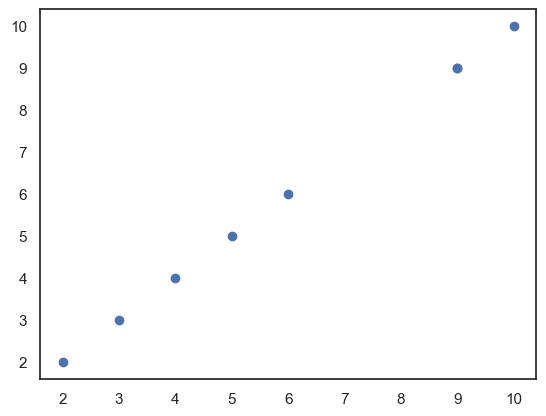

In [9]:
plt.scatter(y_train, y_pred_train)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [10]:
# Your response here. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [11]:
vehicles = pd.read_csv('vehicles.csv')

vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [12]:
vehicles = vehicles.drop(columns=['Make','Model' ,'Vehicle Class', 'Engine Displacement', 'Transmission', 'Drivetrain', 'Fuel Type','City MPG', 'Highway MPG'], axis = 1)

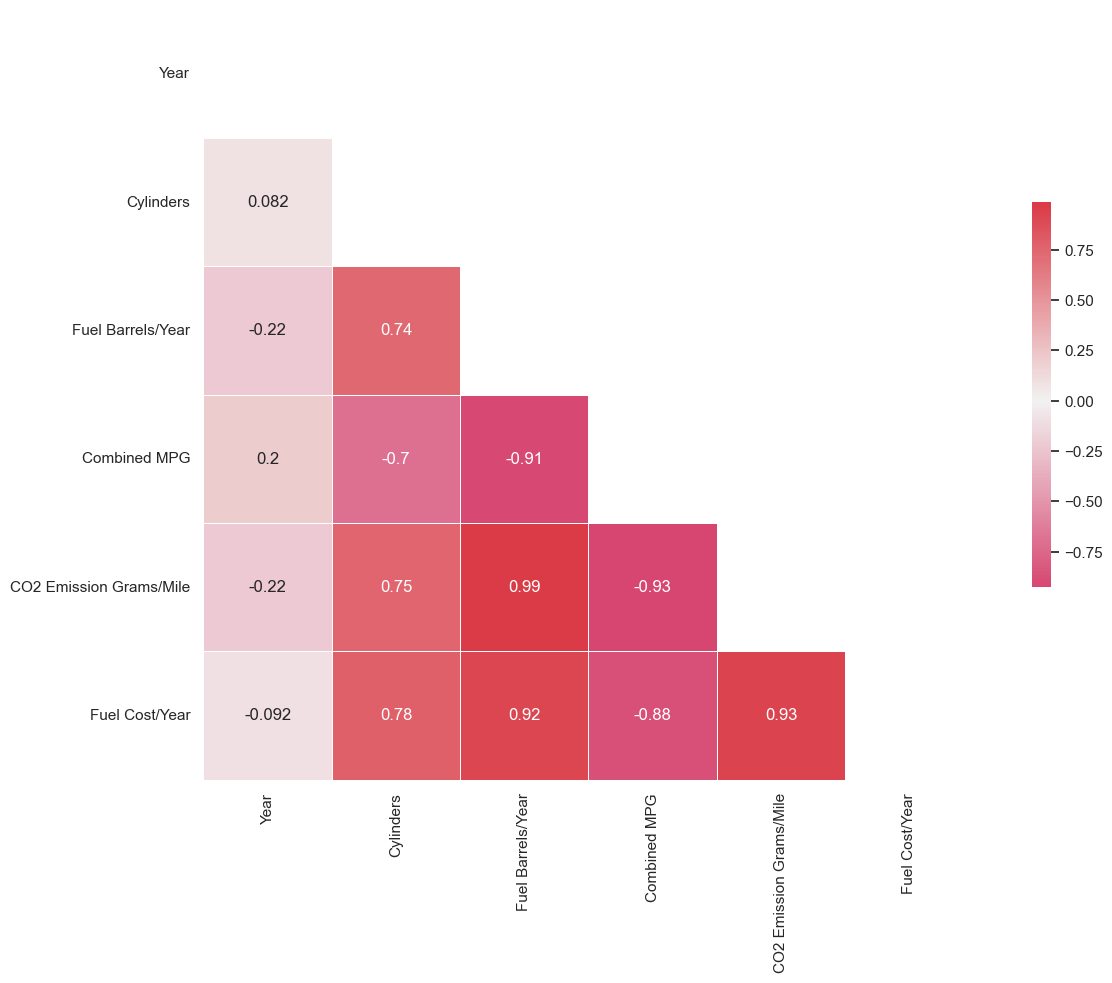

In [13]:
plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(vehicles.corr(), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(vehicles.corr(),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

import warnings
warnings.filterwarnings('ignore')

In [20]:
x=sm.add_constant(vehicles[[
    
    'Year',
    'Cylinders',
    'Fuel Barrels/Year',
    'Combined MPG',
    'CO2 Emission Grams/Mile',
    'Fuel Cost/Year'
    
]].apply(lambda x: x.fillna(x.mean()))

)

y=vehicles['CO2 Emission Grams/Mile']


modelo=sm.OLS(y, x).fit()

pred=modelo.predict(x)

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       1.000
Model:                                 OLS   Adj. R-squared:                  1.000
Method:                      Least Squares   F-statistic:                 2.985e+28
Date:                     Wed, 01 Mar 2023   Prob (F-statistic):               0.00
Time:                             16:28:31   Log-Likelihood:             7.9941e+05
No. Observations:                    35952   AIC:                        -1.599e+06
Df Residuals:                        35945   BIC:                        -1.599e+06
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2.083e-10   6.42e-11     -3.245      0.001   -3.34e-10   -8.25e-11
Year                     7.916e-14   3.19e-14      2.482      0.013    1.67e-14    1.42e-13
Cylinders                1.421e-14   2.71e-13      0.052      0.958   -5.17e-13    5.46e-13
Fuel Barrels/Year       -4.263e-14   3.81e-13     -0.112      0.911   -7.89e-13    7.04e-13
Combined MPG            -3.286e-14   1.47e-13     -0.224      0.823   -3.21e-13    2.55e-13
CO2 Emission Grams/Mile     1.0000   1.71e-14   5.85e+13      0.000       1.000       1.000
Fuel Cost/Year          -1.332e-15   1.66e-15     -0.804      0.421   -4.58e-15    1.91e-15
==============================================================================
Omnibus:                      341.009   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.650
Skew:                           0.242   Prob(JB):                     7.20e-77
Kurtosis:                       2.980   Cond. No.                     6.43e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.43e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.preprocessing import StandardScaler


In [22]:
vehicles.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,1984,4.0,19.388824,17,522.764706,1950
1,1984,6.0,25.354615,13,683.615385,2550
2,1985,4.0,20.600625,16,555.437500,2100
3,1985,6.0,25.354615,13,683.615385,2550
4,1987,6.0,20.600625,16,555.437500,2550


In [23]:
X=vehicles.drop(columns=['CO2 Emission Grams/Mile'], axis = 1)

y=vehicles['CO2 Emission Grams/Mile']

In [24]:
X

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year
0,1984,4.0,19.388824,17,1950
1,1984,6.0,25.354615,13,2550
2,1985,4.0,20.600625,16,2100
3,1985,6.0,25.354615,13,2550
4,1987,6.0,20.600625,16,2550
...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100
35948,2014,3.0,9.155833,36,1100
35949,2015,3.0,9.155833,36,1100
35950,2016,3.0,9.155833,36,1100


In [25]:
from sklearn.metrics import mean_squared_error as mse

rfr = RFR(n_estimators=2000).fit(X_train, y_train)

y_pred = rfr.predict(X_test)

mse(y_test, y_pred, squared=False)

2.0276155947319006

In [26]:
rfr.score(X_test, y_test)

-15.444899999999997

In [27]:
X['random'] = np.random.normal(size=len(X))

X.head()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,random
0,1984,4.0,19.388824,17,1950,-0.412775
1,1984,6.0,25.354615,13,2550,0.242093
2,1985,4.0,20.600625,16,2100,-0.035539
3,1985,6.0,25.354615,13,2550,-0.761783
4,1987,6.0,20.600625,16,2550,-0.928197


In [28]:
X_norm=StandardScaler().fit_transform(X)

dtr = DTR().fit(X_norm, y)

dict(zip(X.columns, dtr.feature_importances_*100))

{'Year': 0.012811019696334606,
 'Cylinders': 0.004433703089963283,
 'Fuel Barrels/Year': 83.88379931310078,
 'Combined MPG': 16.047786288911016,
 'Fuel Cost/Year': 0.011484642555660368,
 'random': 0.03968503264623448}

In [ ]:
X.drop(columns=['Cylinders', 'Year', 'random'], axis=1, inplace=True)

In [ ]:
X_norm=StandardScaler().fit_transform(X)

dtr = DTR().fit(X_norm, y)

dict(zip(X.columns, dtr.feature_importances_*100))

{'Fuel Barrels/Year': 83.89255603155604,
 'Combined MPG': 16.05754823497634,
 'Fuel Cost/Year': 0.04989573346761255}

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 